In [3]:
!pip3 install numpy

import numpy as np

In [23]:
P1 = 12
P2 = 18
M1 = 36
q = 1.4

AB = 4
BC = 3
AC = AB + BC
CD = 2.5
DE = 2
CE = CD + DE
EF = 4.5
BE = BC + CD + DE

# order of unknowns: Ra, Rbx, Rby, Rcx, Rcy, Rd, Rf, Rex, Rey


A = np.array(
    [
        [np.cos(np.pi / 4), 1, 0, -1, 0, 0, 0, 0, 0],
        [np.sin(np.pi / 4), 0, 1, 0, 1, 0, 0, 0, 0],
        [0, 0, AB, 0, AC, 0, 0, 0, 0],
        [0, 0, 0, 1, 0, 0, 0, -1, 0],
        [0, 0, 0, 0, -1, 1, 0, 0, 1],
        [0, 0, 0, 0, 0, CD, 0, 0, CE],
        [0, 0, 0, 0, 0, 0, 0, 1, 0],
        [0, 0, 0, 0, 0, 0, 1, 0, -1],
        [0, 0, 0, 0, 0, 0, EF, 0, 0],
    ]
)

b = np.array(
    [
        0,
        P1 + q * BC,
        P1 * AB / 2 + q * BC * (AB + BC / 2),
        0,
        q * CE,
        q * CE * (CE / 2),
        P2 * np.cos(np.pi / 3),
        P2 * np.sin(np.pi / 3),
        M1 + 2.5 * P2 * np.sin(np.pi / 3),
    ]
)

x = np.linalg.solve(A, b)

solution = {
    "Ra": x[0],
    "Rbx": x[1],
    "Rby": x[2],
    "Rcx": x[3],
    "Rcy": x[4],
    "Rd": x[5],
    "Rf": x[6],
    "Rex": x[7],
    "Rey": x[8],
}

solution


{'Ra': 4.680229388568428,
 'Rbx': 5.690578061834697,
 'Rby': 14.378015477614287,
 'Rcx': 9.000000000000002,
 'Rcy': -1.4874374157795929,
 'Rd': 3.7407658144959157,
 'Rf': 16.660254037844386,
 'Rex': 9.000000000000002,
 'Rey': 1.0717967697244912}

## Task 2

In [31]:
a = 4
b = 4.5
c = 3.5

G = 18
P = 30

A = np.array([0, 0, c])
A0 = np.array([0, 0, 0])
B = np.array([b, 0, c])
B0 = np.array([b, 0, 0])
C = np.array([b, a, c])
C0 = np.array([b, a, 0])
D = np.array([0, a, c])
D0 = np.array([0, a, 0])

unit = lambda p0, p1: (p1 - p0) / np.linalg.norm(p1 - p0)

# project one vector on another and return the projection
project = lambda v, u: np.dot(v, u) * u / np.dot(u, u)

perp = lambda source, target: -source + project(source, target)

R = np.array(
    [
        unit(D0, D),
        unit(C0, D),
        unit(C0, C),
        unit(B0, C),
        unit(B0, B),
        unit(A0, D),
    ]
)

# we count moment around point A
r = np.array(
    [
        np.cross(perp(A - D0, R[0]), R[0]),
        np.cross(perp(A - C0, R[1]), R[1]),
        np.cross(perp(A - C0, R[2]), R[2]),
        np.cross(perp(A - B0, R[3]), R[3]),
        np.cross(perp(A - B0, R[4]), R[4]),
        np.cross(perp(A - A0, R[5]), R[5]),
    ]
)

Am = np.vstack((R.T, r.T))

R.T, R.T.shape, r.T, r.T.shape, Am, Am.shape


(array([[ 0.        , -0.78935222,  0.        ,  0.        ,  0.        ,
          0.        ],
        [ 0.        ,  0.        ,  0.        ,  0.75257669,  0.        ,
          0.75257669],
        [ 1.        ,  0.61394061,  1.        ,  0.65850461,  1.        ,
          0.65850461]]),
 (3, 6),
 array([[ 4.00000000e+00,  2.45576245e+00,  4.00000000e+00,
          2.63401843e+00,  0.00000000e+00,  2.63401843e+00],
        [ 0.00000000e+00,  1.94746001e-16, -4.50000000e+00,
         -2.96327074e+00, -4.50000000e+00, -0.00000000e+00],
        [ 0.00000000e+00,  3.15740887e+00,  0.00000000e+00,
          3.38659513e+00,  0.00000000e+00,  0.00000000e+00]]),
 (3, 6),
 array([[ 0.00000000e+00, -7.89352217e-01,  0.00000000e+00,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
        [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
          7.52576695e-01,  0.00000000e+00,  7.52576695e-01],
        [ 1.00000000e+00,  6.13940614e-01,  1.00000000e+00,
          6.58504608e-

In [32]:
import matplotlib.pyplot as plt

/tmp/ipykernel_1288065/4038055157.py:31: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


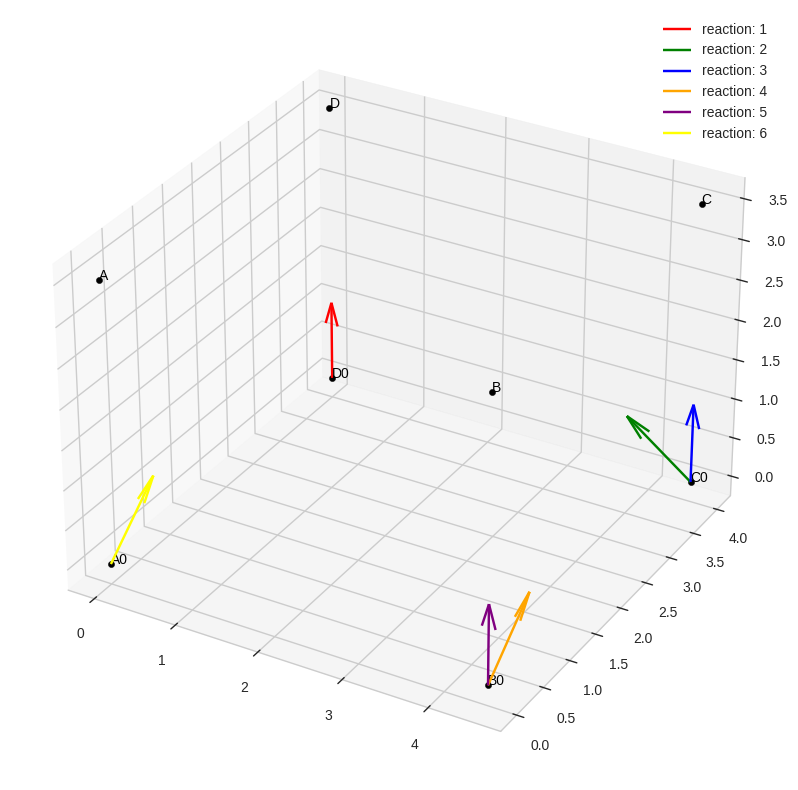

In [45]:
# create 3d plot
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection="3d")

# set style
plt.style.use("seaborn-whitegrid")

# plot the vectors
for point, label in zip(
    [A0, B0, C0, D0, A, B, C, D], ["A0", "B0", "C0", "D0", "A", "B", "C", "D"]
):
    ax.scatter(point[0], point[1], point[2], color="black")
    ax.text(point[0], point[1], point[2], label, color="black")

import itertools

color = itertools.cycle(["red", "green", "blue", "orange", "purple", "yellow"])

for i, (source, vector) in enumerate(zip([D0, C0, C0, B0, B0, A0], R)):
    ax.quiver(
        source[0],
        source[1],
        source[2],
        vector[0],
        vector[1],
        vector[2],
        label=f"reaction: {i + 1}",
        color=next(color),
        length=1,
    )

ax.legend()
fig.show()


In [34]:
Bm = np.array([-P, 0, G, *np.cross(np.array([b / 2, a / 2, 0]), np.array([0, 0, G]))])

Bm


array([-30. ,   0. ,  18. ,  36. , -40.5,   0. ])

In [35]:
# solve Ax=B

x = np.linalg.solve(Am, Bm)

x

array([-37.66666667,  38.0058475 ,  23.33333333, -35.43381938,
         9.        ,  35.43381938])

In [36]:
r

array([[ 4.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 2.45576245e+00,  1.94746001e-16,  3.15740887e+00],
       [ 4.00000000e+00, -4.50000000e+00,  0.00000000e+00],
       [ 2.63401843e+00, -2.96327074e+00,  3.38659513e+00],
       [ 0.00000000e+00, -4.50000000e+00,  0.00000000e+00],
       [ 2.63401843e+00, -0.00000000e+00,  0.00000000e+00]])

In [37]:
reactions = np.array([row * coef for row, coef in zip(R, x)])

reactions

array([[ -0.        ,  -0.        , -37.66666667],
       [-30.        ,   0.        ,  23.33333333],
       [  0.        ,   0.        ,  23.33333333],
       [ -0.        , -26.66666667, -23.33333333],
       [  0.        ,   0.        ,   9.        ],
       [  0.        ,  26.66666667,  23.33333333]])

[0 0 0]
[4.5 0.  0. ]
[4.5 4.  0. ]
[0 4 0]
[0.  0.  3.5]
[4.5 0.  3.5]
[4.5 4.  3.5]
[0.  4.  3.5]


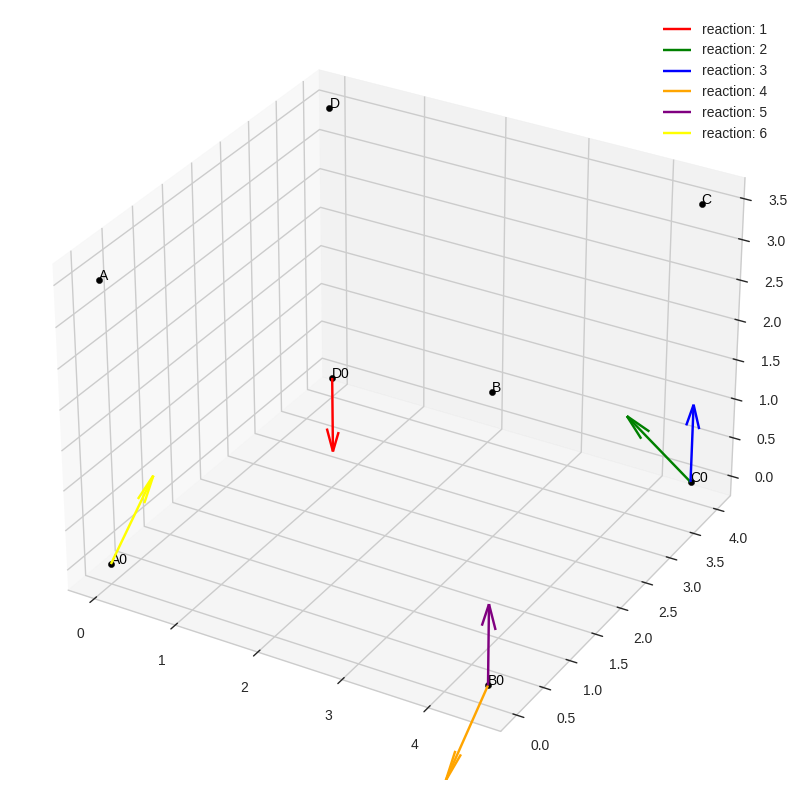

In [41]:
# plot reactions

# create 3d plot
fig = plt.figure(figsize=(10, 10))

# set style
plt.style.use("seaborn-whitegrid")

ax = fig.add_subplot(111, projection="3d")
color = itertools.cycle(["red", "green", "blue", "orange", "purple", "yellow"])

# plot the vectors
for point, label in zip(
    [A0, B0, C0, D0, A, B, C, D], ["A0", "B0", "C0", "D0", "A", "B", "C", "D"]
):
    ax.scatter(point[0], point[1], point[2], color="black")
    # add a patch with text in 3d
    print(point)
    ax.text(point[0], point[1], point[2], label, None, size=10, zorder=1, color="k")

for i, (source, vector) in enumerate(zip([D0, C0, C0, B0, B0, A0], reactions)):

    vector = vector / np.linalg.norm(vector)

    ax.quiver(
        source[0],
        source[1],
        source[2],
        vector[0],
        vector[1],
        vector[2],
        label=f"reaction: {i + 1}",
        color=next(color),
        length=1,
    )

ax.legend()
